In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import log_loss,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [2]:
# Reading data
data= pd.read_csv('C:/Users/Stevelal/Data Analysis Final Project/B2_T2.csv')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [3]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [4]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [5]:
data.isna().mean()

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Y                       0.000000
dtype: float64

In [6]:
data.shape

(12684, 26)

<AxesSubplot:>

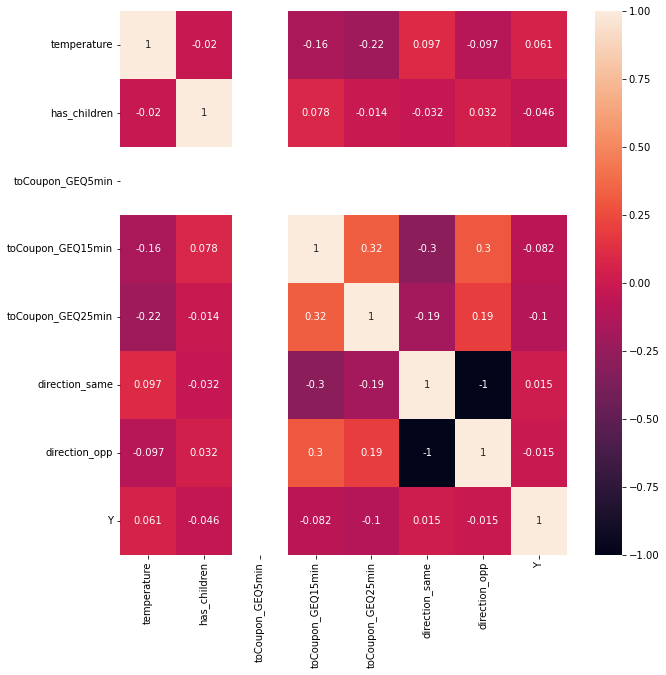

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [8]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Share of coupon accepted or not in data')

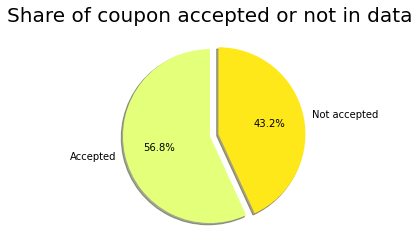

In [9]:
# plotting a pie chart to represent share of coupon accepted or not in data 

labels = ['Accepted','Not accepted']
sizes = data['Y'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [ 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90,autopct='%1.1f%%')
plt.title('Share of coupon accepted or not in data', fontsize = 20)

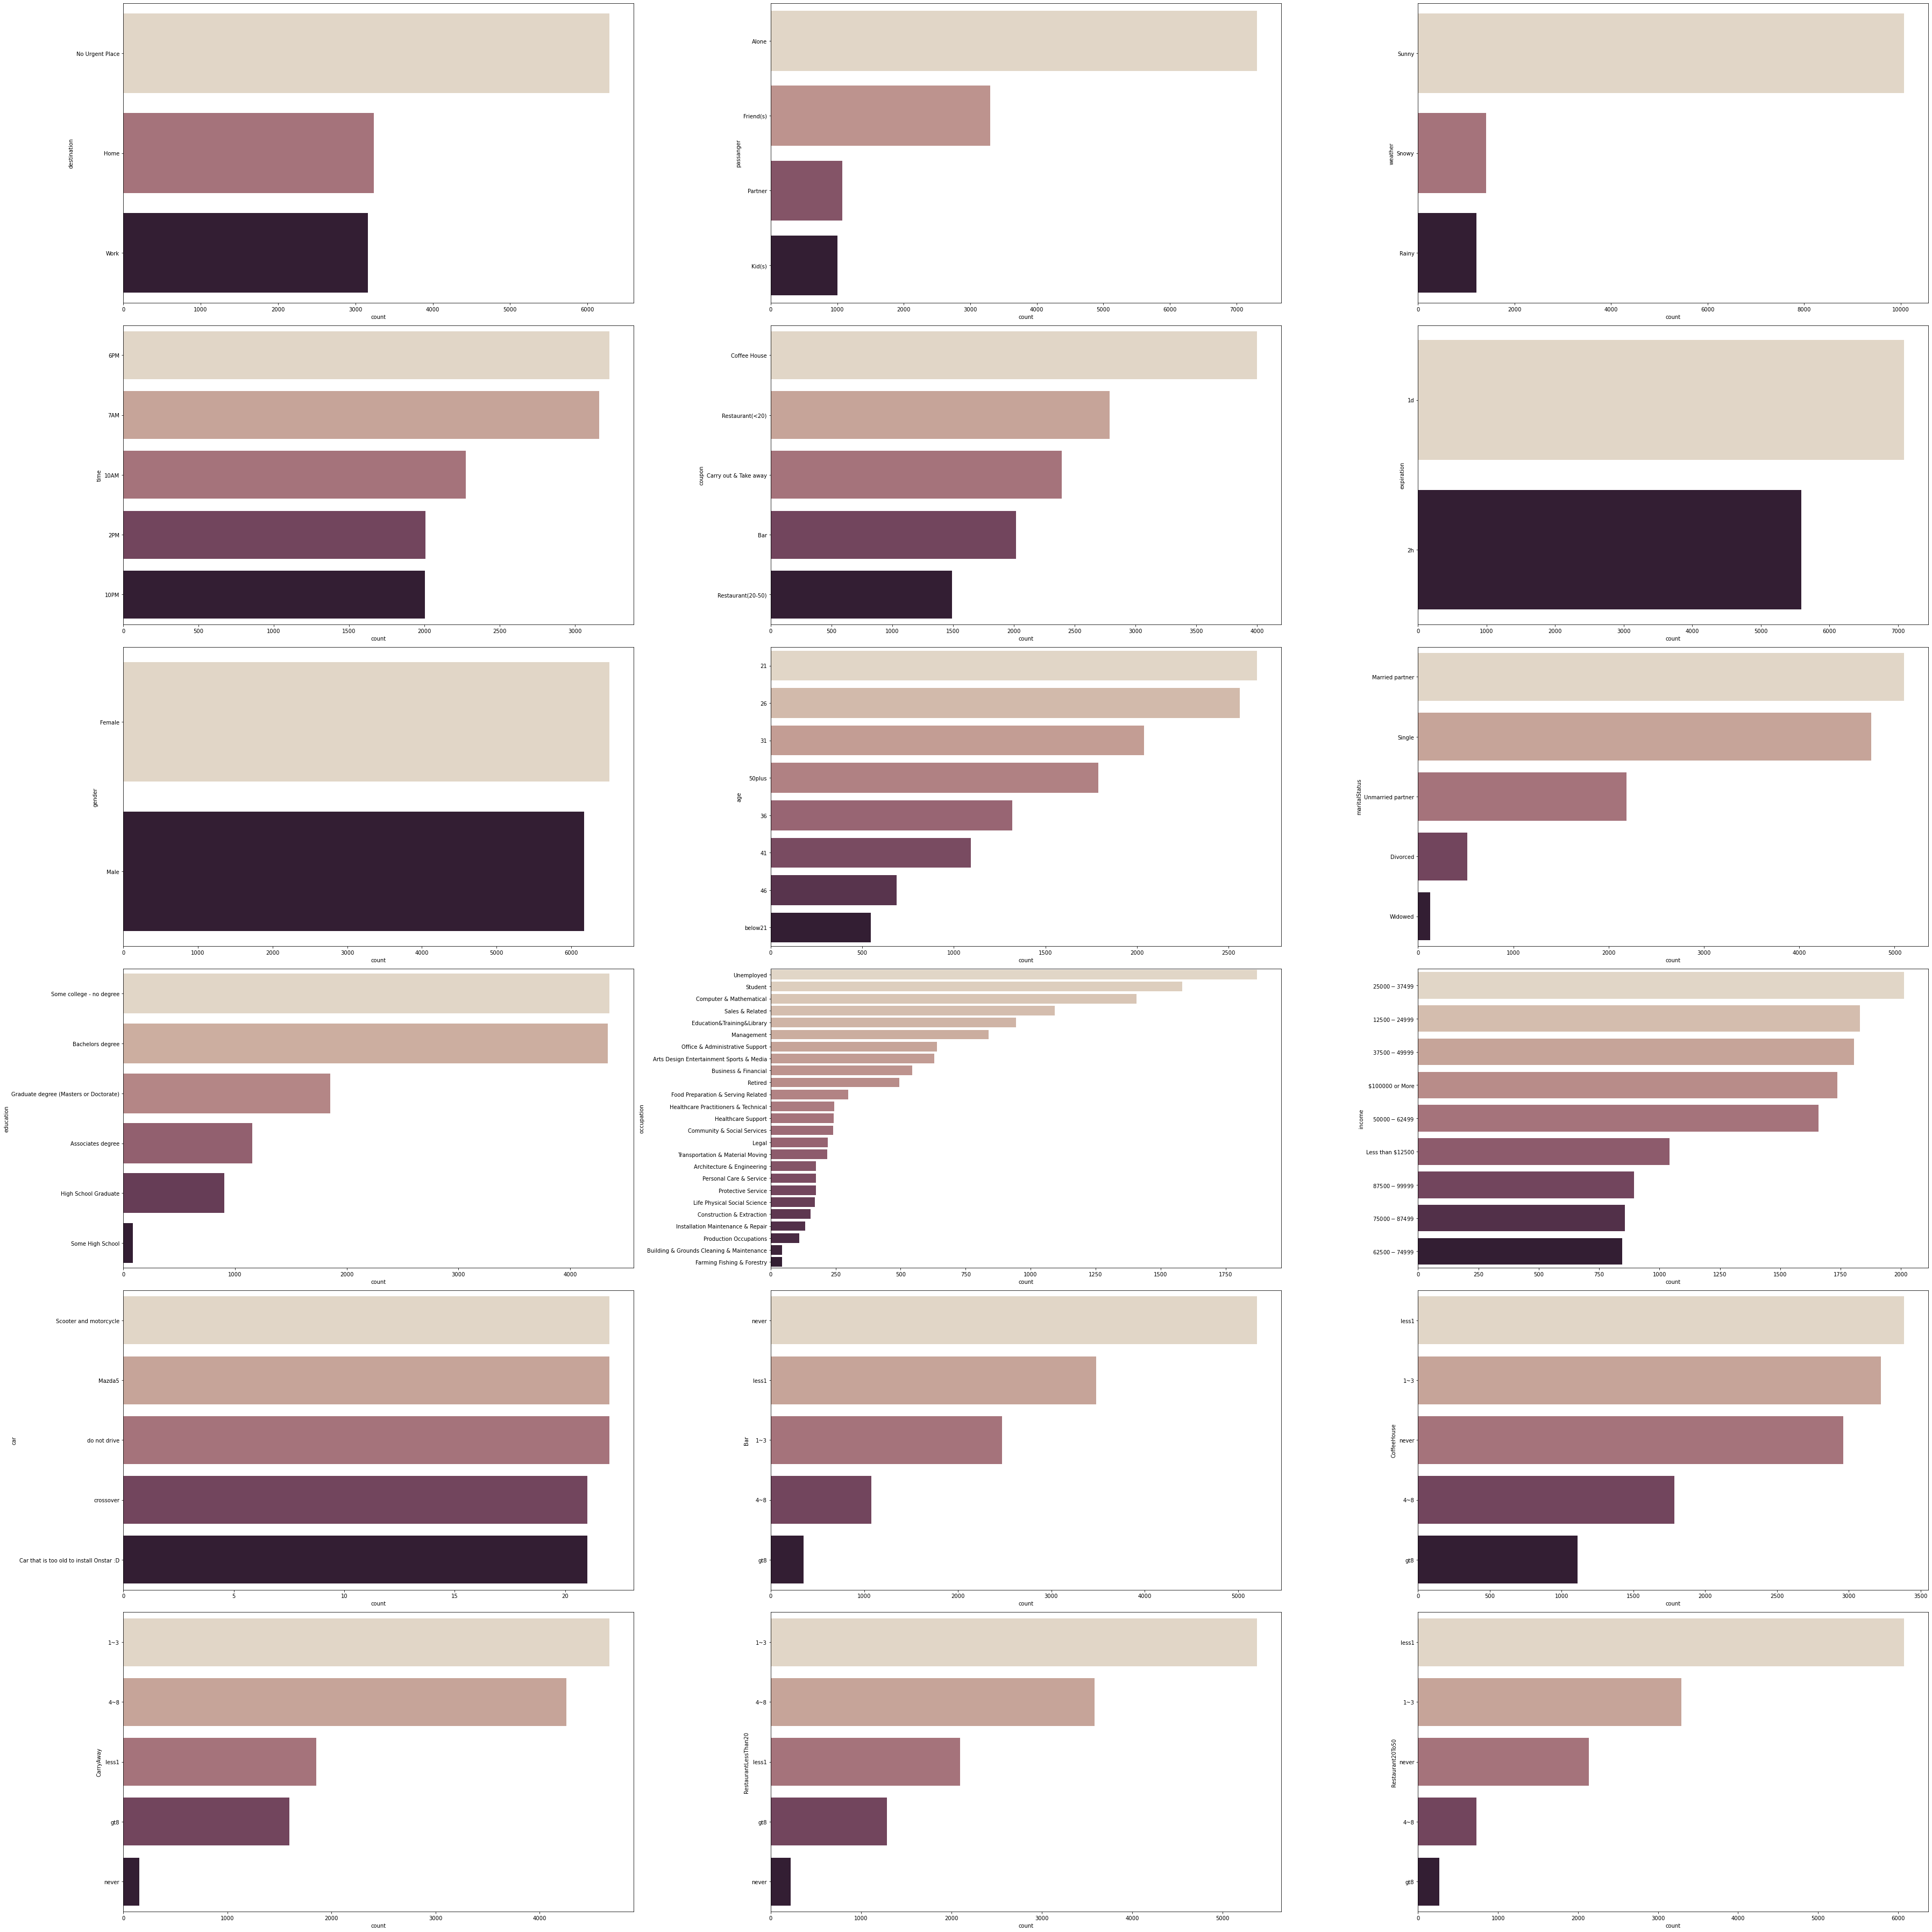

In [10]:
fig, axes = plt.subplots(6, 3, figsize=(50,50))
axes = axes.flatten()

for ax, col in zip(axes, data.select_dtypes('object').columns):
    sns.countplot(y=col, data=data, ax=ax, 
                  palette="ch:.25", order=data[col].value_counts().index);

plt.tight_layout()
plt.show()

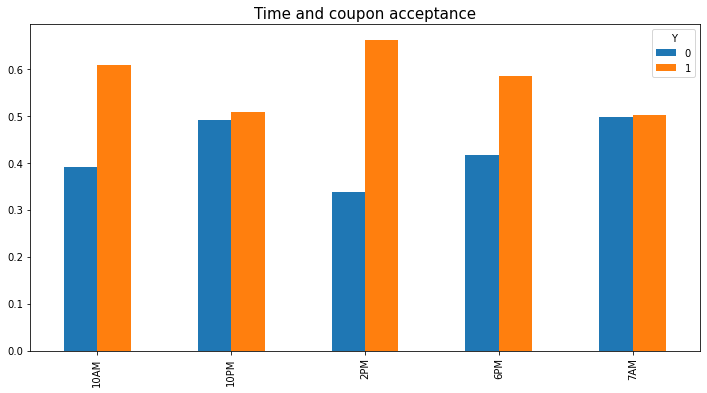

In [11]:
plt.rcParams['figure.figsize'] = (12,6)
x = pd.crosstab(data['time'], data['Y'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Time and coupon acceptance', fontsize = 15)
plt.xlabel('')
plt.show()

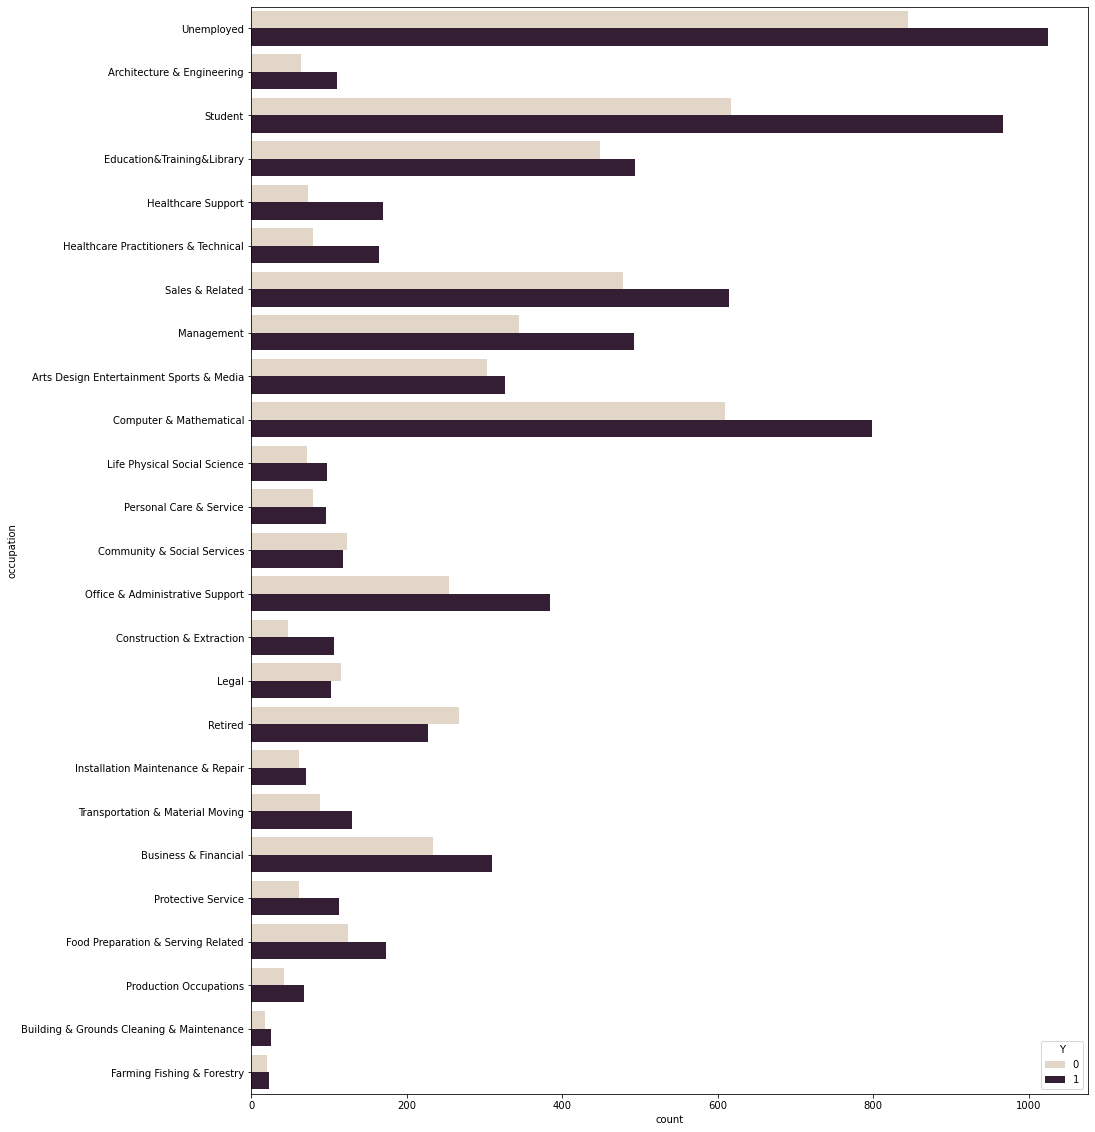

In [12]:
plt.subplots(figsize=(15, 20))
sns.countplot(y ='occupation', hue='Y', data=data, palette='ch:.25');
plt.show()

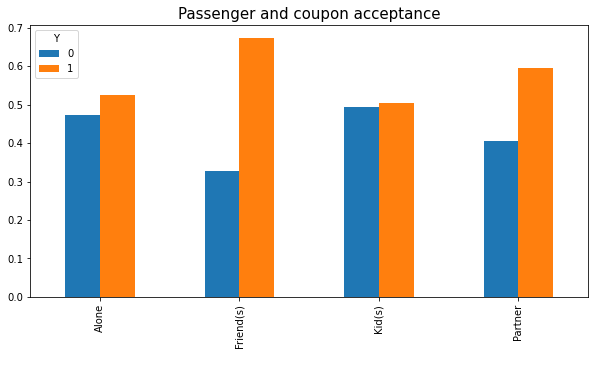

In [13]:
plt.rcParams['figure.figsize'] = (10,5)
x = pd.crosstab(data['passanger'], data['Y'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Passenger and coupon acceptance', fontsize = 15)
plt.xlabel(' ')
plt.show()

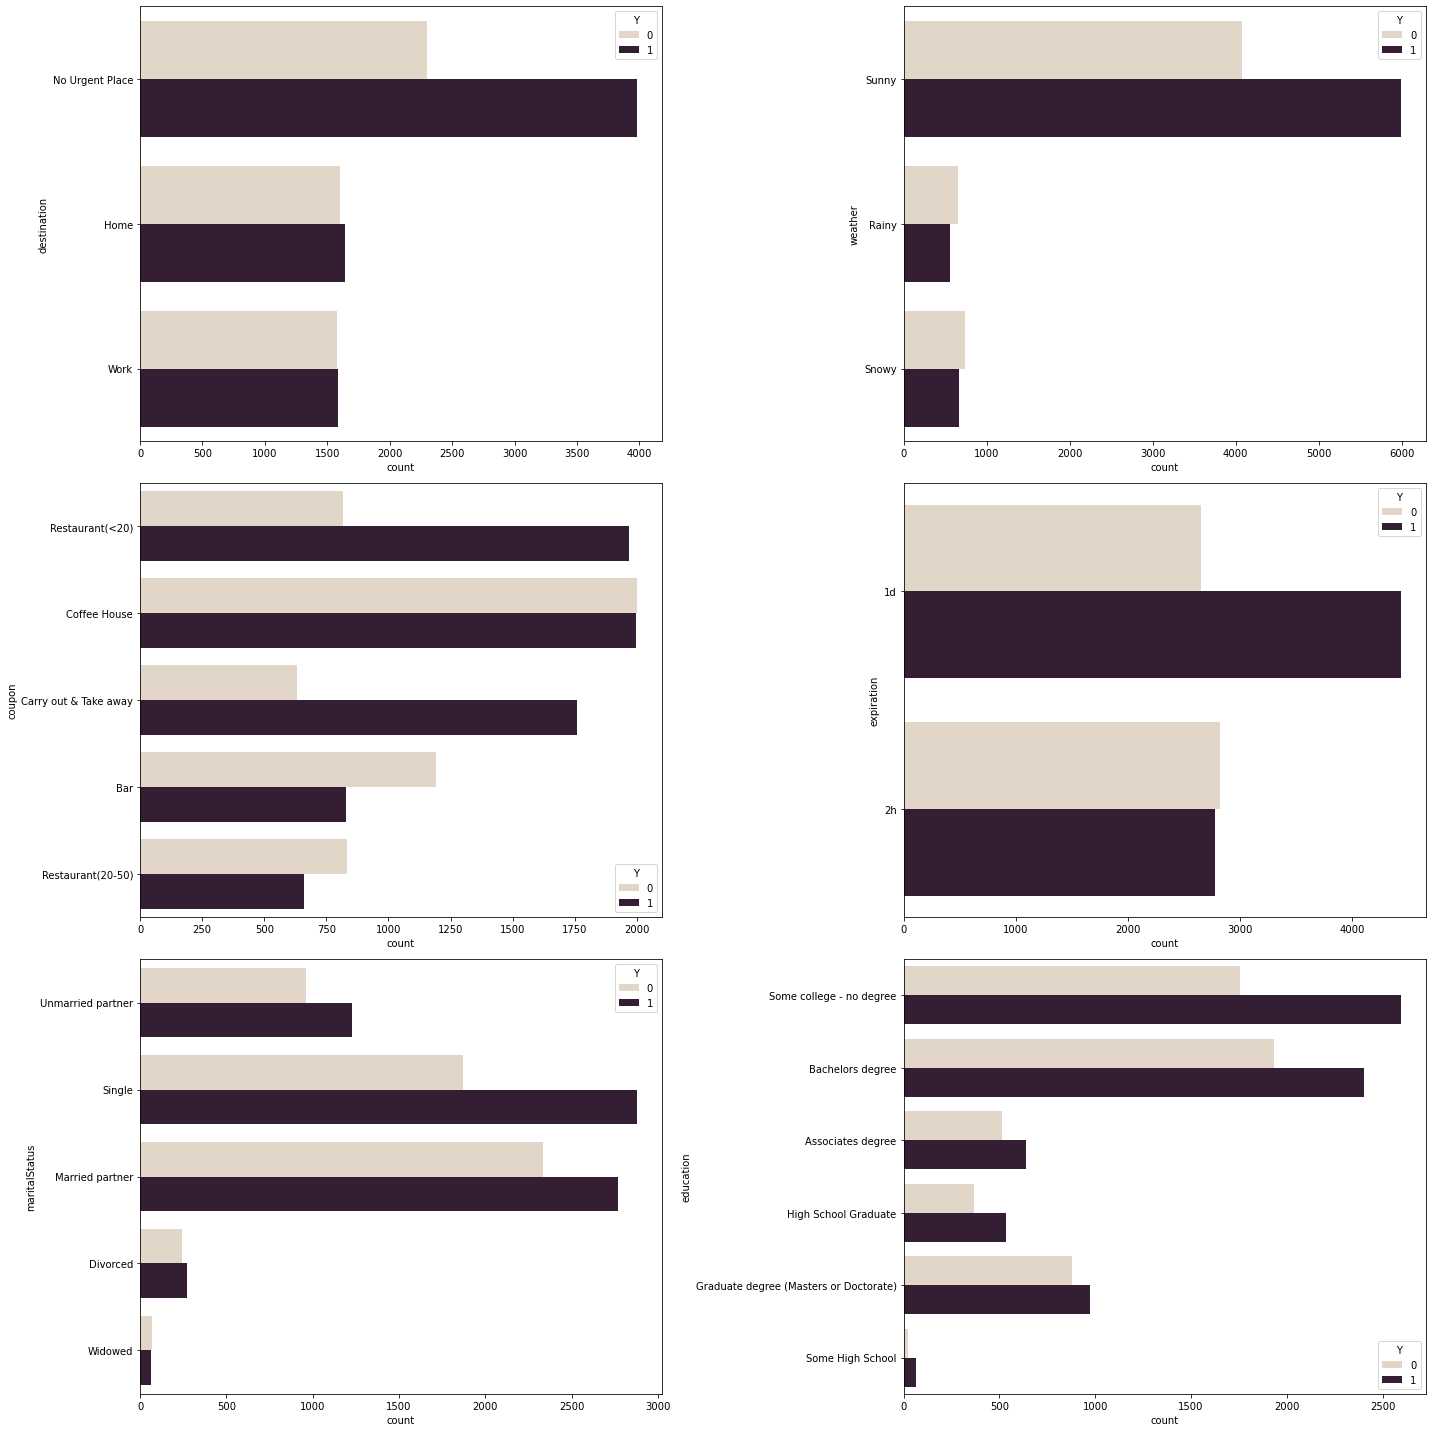

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes = axes.flatten()

for ax, col in zip(axes, ['destination', 'weather', 
                          'coupon', 'expiration', 'maritalStatus',
                          'education']):
    sns.countplot(y=col, hue='Y', data=data, ax=ax, palette='ch:.25')
plt.tight_layout()
plt.show()

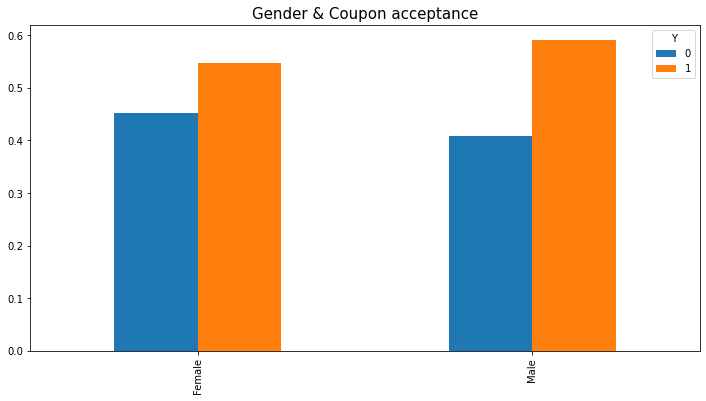

In [15]:
plt.rcParams['figure.figsize'] = (12,6)
x = pd.crosstab(data['gender'], data['Y'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Gender & Coupon acceptance', fontsize = 15)
plt.xlabel('')
plt.show()

Inferences: 
1. Among the customers, male customers are likely to accept the coupons more. 
2. unemployed and students category received more coupons and majority of them accepted the coupon
3. The acceptance ratio is high amoung those who travel with the friends.
4. The coupons received at 2PM has more acceptance ratio. 
5. People that has no urgent place to go has a higher probability to accept the coupon.
6. People tend to accept the coupon when it is sunny.
7. If the coupon is of a coffee house, the probability of accepting the coupon is just the same as rejecting it. If the coupon is of a cheap restaurant or carry out, most people will accept the coupon. If the coupon is of a Bar of expensive Restaurant, people tend to refuse it.
8. People are more likely to accept a coupon that expires in one day than one in two hours.
9. Single people are most likely to accept the coupon.
10. Some college, Bachelor or high school graduate are more likely to accept the coupon

# Pre-processing


In [16]:
data.isna().mean()*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

In [17]:
data['Bar']= data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse']= data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway']= data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20']= data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50']= data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])

In [18]:
data= data.drop(['car'], axis= 1)

In [19]:
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

array([[<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'has_children'}>,
        <AxesSubplot:title={'center':'toCoupon_GEQ5min'}>],
       [<AxesSubplot:title={'center':'toCoupon_GEQ15min'}>,
        <AxesSubplot:title={'center':'toCoupon_GEQ25min'}>,
        <AxesSubplot:title={'center':'direction_same'}>],
       [<AxesSubplot:title={'center':'direction_opp'}>,
        <AxesSubplot:title={'center':'Y'}>, <AxesSubplot:>]], dtype=object)

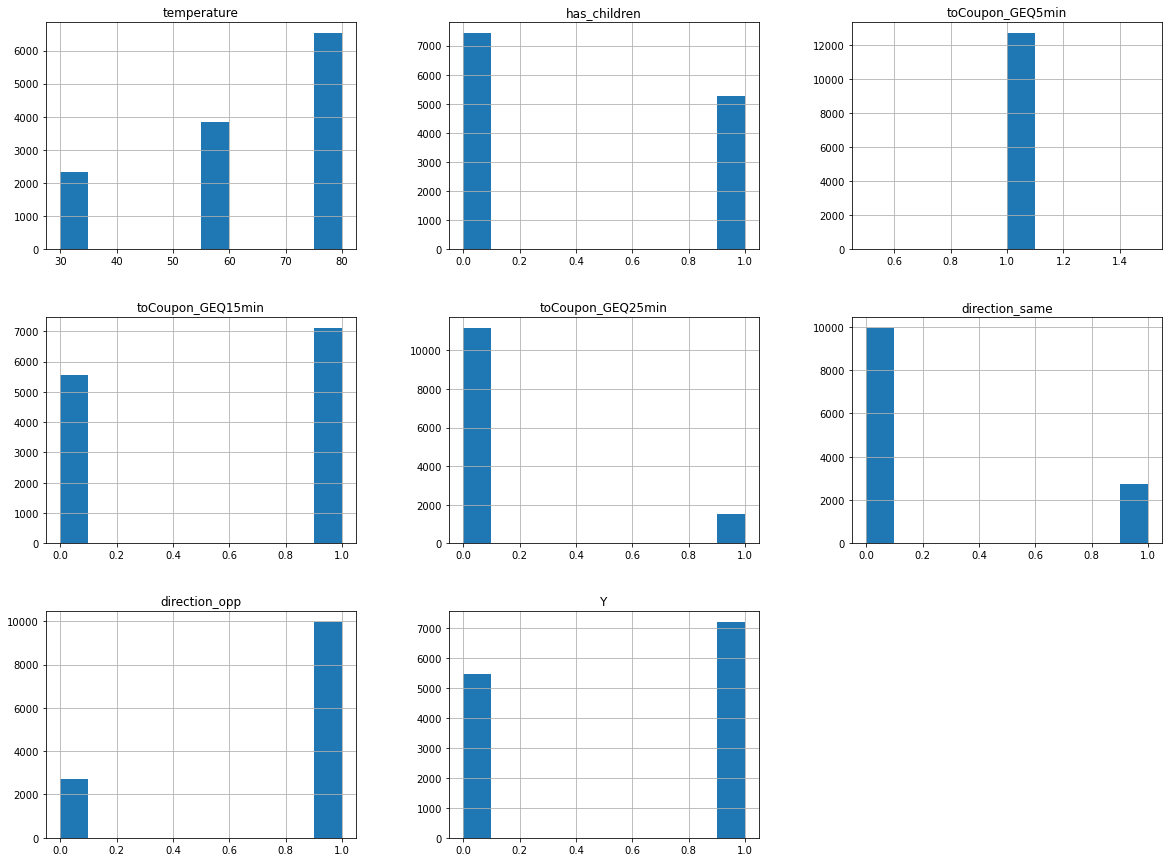

In [20]:
freqgraph= data.select_dtypes(include= ['int64'])
freqgraph.hist(figsize=(20,15))

C:\Users\Stevelal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Range')

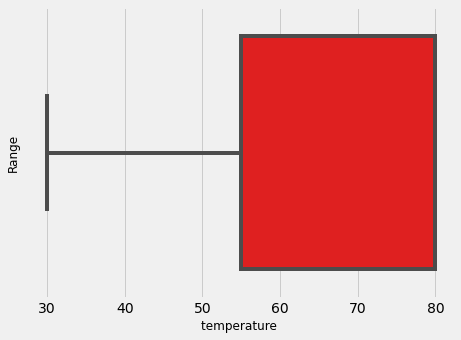

In [21]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(data['temperature'], color = 'red')
plt.xlabel('temperature ', fontsize = 12)
plt.ylabel('Range', fontsize = 12)



In [22]:
data['age'].value_counts(normalize=True)

21         0.209161
26         0.201750
31         0.160754
50plus     0.140965
36         0.103989
41         0.086172
46         0.054084
below21    0.043125
Name: age, dtype: float64

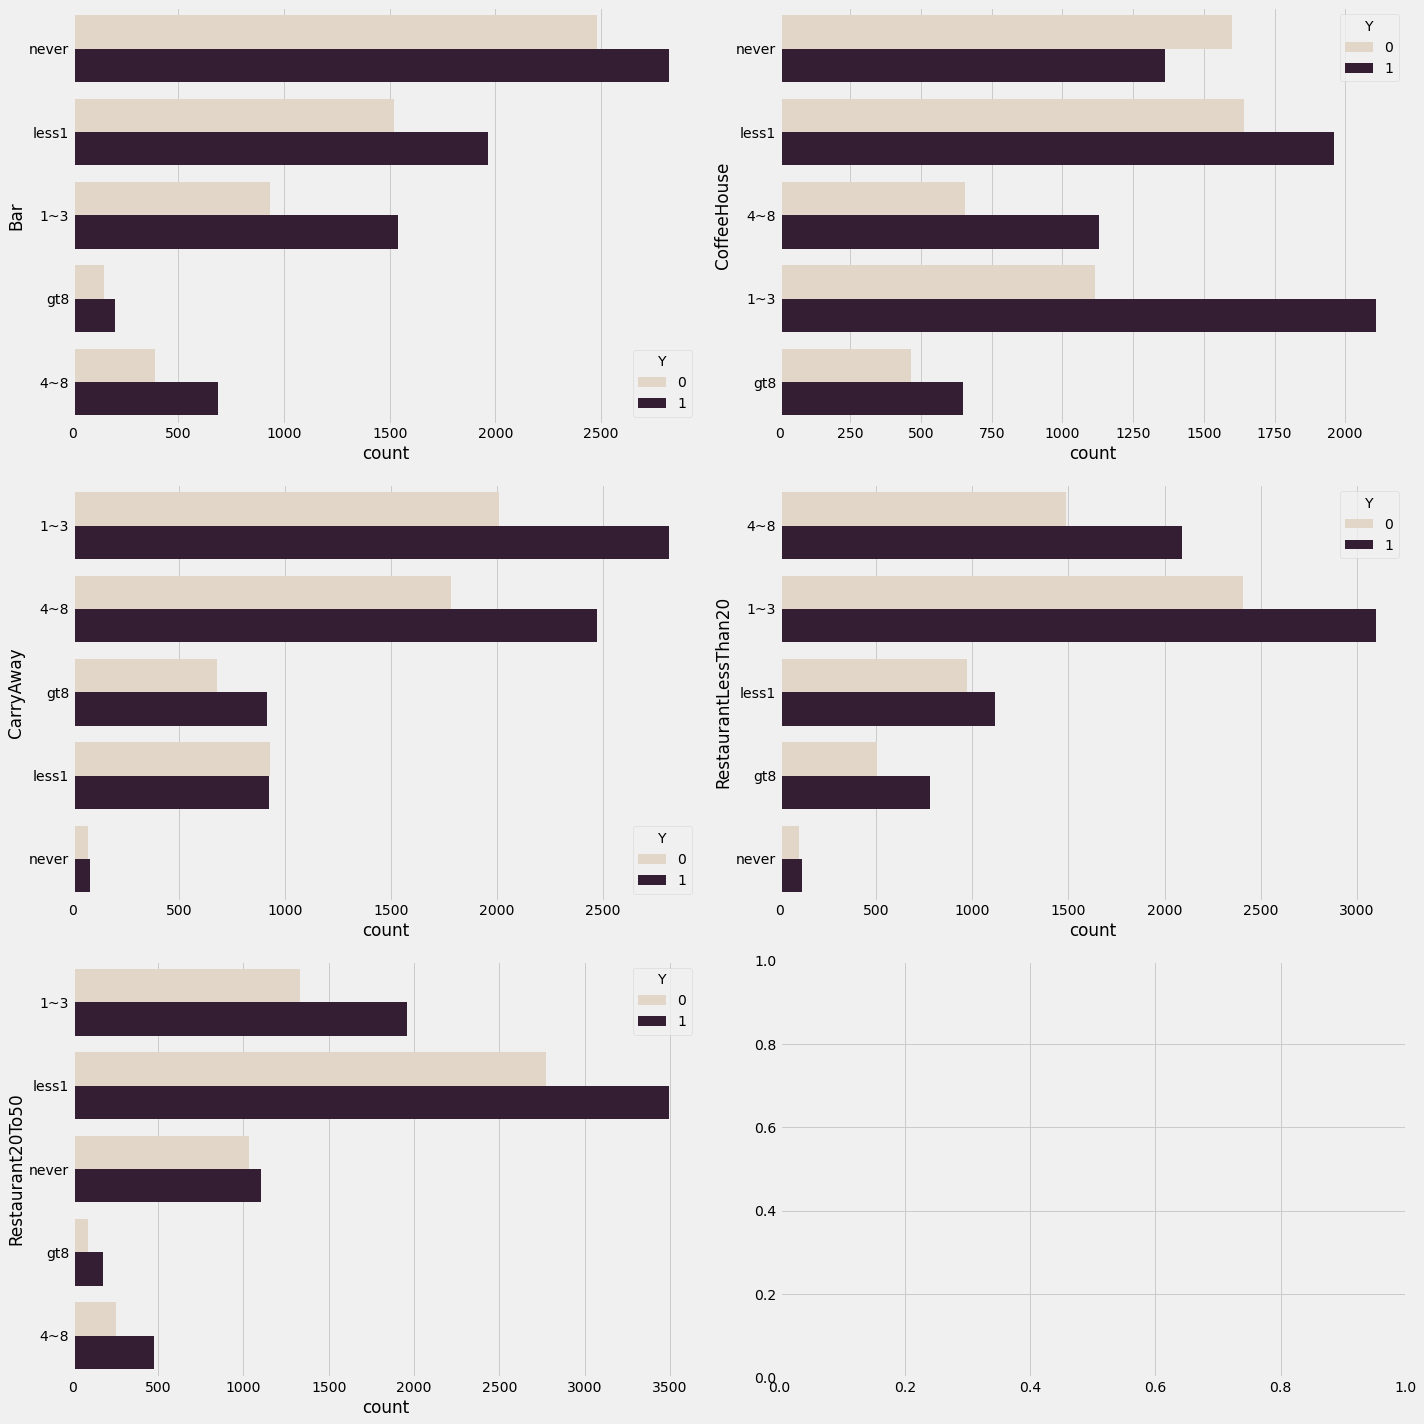

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes = axes.flatten()
for ax, col in zip(axes, ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20', 'Restaurant20To50']):
    sns.countplot(y=col, hue='Y', data=data, ax=ax, palette='ch:.25')
plt.tight_layout()
plt.show()

In [24]:
data.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

In [25]:
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()

data = pd.get_dummies(data, columns = ['age'])
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,maritalStatus,has_children,...,direction_opp,Y,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,Unmarried partner,1,...,1,1,1,0,0,0,0,0,0,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,Unmarried partner,1,...,1,0,1,0,0,0,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,Unmarried partner,1,...,1,1,1,0,0,0,0,0,0,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,Unmarried partner,1,...,1,0,1,0,0,0,0,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,Unmarried partner,1,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,Single,0,...,0,1,0,1,0,0,0,0,0,0
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,Single,0,...,1,1,0,1,0,0,0,0,0,0
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,Single,0,...,0,0,0,1,0,0,0,0,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,Single,0,...,1,0,0,1,0,0,0,0,0,0


In [27]:
data['Age'] = None
data.loc[data['age_50plus'] == 1, 'Age'] = '50 & Above'
data.loc[data['age_21'] == 1, 'Age'] = '21-30'
data.loc[data['age_26'] == 1, 'Age'] = '21-30'
data.loc[data['age_31'] == 1, 'Age'] = '31-40'
data.loc[data['age_36'] == 1, 'Age'] = '31-40'
data.loc[data['age_41'] == 1, 'Age'] = '41-50'
data.loc[data['age_46'] == 1, 'Age'] = '41-50'
data.loc[data['age_below21'] == 1, 'Age'] = 'Below 21'

data.Age.isna().sum()

0

In [28]:
data['Age'].unique()

array(['21-30', '41-50', '31-40', '50 & Above', 'Below 21'], dtype=object)

In [29]:
data.drop(columns=['age_21', 'age_26','age_31','age_36','age_41','age_46','age_50plus','age_below21'], inplace=True)

In [30]:
data['distance'] = None
data.loc[data['toCoupon_GEQ15min'] == 0, 'distance'] ='within 15min'
data.loc[(data['toCoupon_GEQ15min'] == 1) & \
             (data['toCoupon_GEQ25min'] == 0), 'distance'] = 'Between 15-25 min'
data.loc[data['toCoupon_GEQ25min'] == 1, 'distance'] = 'morethan25min'
data.distance.isna().sum()

0

In [31]:
data['distance'].value_counts()

Between 15-25 min    5611
within 15min         5562
morethan25min        1511
Name: distance, dtype: int64

In [32]:
binary_attrs = ['gender', 'has_children', 'direction_same']
frequency_attrs = ['Bar', 'CoffeeHouse', 'CarryAway', 
                   'RestaurantLessThan20', 'Restaurant20To50']
ordinal_attrs = ['temperature', 'time', 'expiration', 'Age', 
                 'education', 'income']
nominal_attrs = ['destination', 'passenger', 'weather', 'coupon', 
                 'maritalStatus', 'occupation', 'distance']

# Encoding ordinal attributes
income_order = ['Less than $12500', '$12500 - $24999', 
                '$25000 - $37499', '$37500 - $49999', 
                '$50000 - $62499', '$62500 - $74999', 
                '$75000 - $87499', '$87500 - $99999', 
                '$100000 or More']
edu_order = ['Some High School', 'High School Graduate', 
             'Some college - no degree', 'Associates degree', 
             'Bachelors degree', 
             'Graduate degree (Masters or Doctorate)']
age_order = ['Below 21','21-30', '31-40', '41-50', '50 & Above']
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
expiration_order = ['2h', '1d']
temperature_order= [30,55,80]

def reorder_encoding(attr, order):
    data[attr] = data[attr].astype('category')
    data[attr] = data[attr].cat.reorder_categories(
        new_categories=order,
        ordered=True
    )

    return pd.Series(data[attr].cat.codes, name=attr)


X_income = reorder_encoding('income', income_order)
X_edu = reorder_encoding('education', edu_order)
X_age = reorder_encoding('Age', age_order)
X_time = reorder_encoding('time', time_order)
X_expiration = reorder_encoding('expiration', expiration_order)
X_temperature= reorder_encoding('temperature', temperature_order)

In [33]:
X_income

0        3
1        3
2        3
3        3
4        3
        ..
12679    6
12680    6
12681    6
12682    6
12683    6
Name: income, Length: 12684, dtype: int8

In [34]:
freq_order = {
    'never': 0, 
    'less1': 1,
    '1~3': 2, 
    '4~8': 3, 
    'gt8': 4
}

for col in frequency_attrs:
    data[col] = data[col].map(freq_order, na_action='ignore')

In [35]:
# Encoding the non-integer varaibles for further analysis
from sklearn.preprocessing import LabelEncoder
label_en= LabelEncoder()

a=['destination', 'passanger', 'gender', 'weather', 'maritalStatus', 'occupation','coupon','distance','has_children', 'direction_same']
for i in np.arange(len(a)):
    data[a[i]]= label_en.fit_transform(data[a[i]])
a= data[['destination', 'passanger', 'gender', 'weather', 'maritalStatus', 'occupation', 'coupon', 'distance','has_children', 'direction_same']]

In [36]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,maritalStatus,has_children,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Age,distance
0,1,0,2,55,2PM,4,1d,0,3,1,...,3,2,1,0,0,0,1,1,21-30,2
1,1,1,2,80,10AM,2,2h,0,3,1,...,3,2,1,0,0,0,1,0,21-30,2
2,1,1,2,80,10AM,1,2h,0,3,1,...,3,2,1,1,0,0,1,1,21-30,0
3,1,1,2,80,2PM,2,2h,0,3,1,...,3,2,1,1,0,0,1,0,21-30,0
4,1,1,2,80,2PM,2,1d,0,3,1,...,3,2,1,1,0,0,1,0,21-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,0,55,6PM,1,1d,1,2,0,...,3,2,1,0,0,1,0,1,21-30,2
12680,2,0,0,55,7AM,1,1d,1,2,0,...,3,2,1,0,0,0,1,1,21-30,2
12681,2,0,1,30,7AM,2,1d,1,2,0,...,3,2,1,0,0,1,0,0,21-30,2
12682,2,0,1,30,7AM,0,1d,1,2,0,...,3,2,1,1,1,0,1,0,21-30,1


In [37]:
# sum up all encoded attributes
data1 = pd.concat(
    [a, 
     X_income, 
     X_edu, 
     X_age, 
     X_time, 
     X_expiration,
     X_temperature,
     data[frequency_attrs], 
    data['Y']],
    axis=1
)
print(data1.shape)

(12684, 22)


In [38]:
data1['distance'].value_counts()

0    5611
2    5562
1    1511
Name: distance, dtype: int64

In [39]:
data1.columns

Index(['destination', 'passanger', 'gender', 'weather', 'maritalStatus',
       'occupation', 'coupon', 'distance', 'has_children', 'direction_same',
       'income', 'education', 'Age', 'time', 'expiration', 'temperature',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50', 'Y'],
      dtype='object')

In [40]:
data1

,destination,passanger,gender,weather,maritalStatus,occupation,coupon,distance,has_children,direction_same,...,Age,time,expiration,temperature,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y
0,1,0,0,2,3,24,4,2,1,0,...,1,2,1,1,0,0,2,3,2,1
1,1,1,0,2,3,24,2,2,1,0,...,1,1,0,2,0,0,2,3,2,0
2,1,1,0,2,3,24,1,0,1,0,...,1,1,0,2,0,0,2,3,2,1
3,1,1,0,2,3,24,2,0,1,0,...,1,2,0,2,0,0,2,3,2,0
4,1,1,0,2,3,24,2,0,1,0,...,1,2,1,2,0,0,2,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,1,0,2,21,1,2,0,1,...,1,3,1,1,0,0,2,3,2,1
12680,2,0,1,0,2,21,1,2,0,0,...,1,0,1,1,0,0,2,3,2,1
12681,2,0,1,1,2,21,2,2,0,1,...,1,0,1,0,0,0,2,3,2,0
12682,2,0,1,1,2,21,0,1,0,0,...,1,0,1,0,0,0,2,3,2,0


In [41]:
data1.isna().sum()

destination             0
passanger               0
gender                  0
weather                 0
maritalStatus           0
occupation              0
coupon                  0
distance                0
has_children            0
direction_same          0
income                  0
education               0
Age                     0
time                    0
expiration              0
temperature             0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
Y                       0
dtype: int64

In [42]:
data1

,destination,passanger,gender,weather,maritalStatus,occupation,coupon,distance,has_children,direction_same,...,Age,time,expiration,temperature,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y
0,1,0,0,2,3,24,4,2,1,0,...,1,2,1,1,0,0,2,3,2,1
1,1,1,0,2,3,24,2,2,1,0,...,1,1,0,2,0,0,2,3,2,0
2,1,1,0,2,3,24,1,0,1,0,...,1,1,0,2,0,0,2,3,2,1
3,1,1,0,2,3,24,2,0,1,0,...,1,2,0,2,0,0,2,3,2,0
4,1,1,0,2,3,24,2,0,1,0,...,1,2,1,2,0,0,2,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,1,0,2,21,1,2,0,1,...,1,3,1,1,0,0,2,3,2,1
12680,2,0,1,0,2,21,1,2,0,0,...,1,0,1,1,0,0,2,3,2,1
12681,2,0,1,1,2,21,2,2,0,1,...,1,0,1,0,0,0,2,3,2,0
12682,2,0,1,1,2,21,0,1,0,0,...,1,0,1,0,0,0,2,3,2,0


In [43]:
data1.columns

Index(['destination', 'passanger', 'gender', 'weather', 'maritalStatus',
       'occupation', 'coupon', 'distance', 'has_children', 'direction_same',
       'income', 'education', 'Age', 'time', 'expiration', 'temperature',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50', 'Y'],
      dtype='object')

In [44]:
data1.to_csv('C:/Users/Stevelal/anaconda3/Lib/site-packages/Data Analysis Final Project/TestAPP1/prepared_data.csv')

In [45]:
from sklearn.model_selection import train_test_split

# lets split the target data from the train data

y = data1['Y']
x = data1.drop(['Y'], axis = 1)
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= 30,test_size= 0.2)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_test)

StandardScaler()

In [48]:
# Importing the different models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score, f1_score

In [49]:
#defining the models

knn_model= KNeighborsClassifier()
Logit_model= LogisticRegression()
svm_model = SVC(kernel = 'rbf', random_state = 0, probability=True)
rf_model= RandomForestClassifier()
dt_model= DecisionTreeClassifier()
Ab_model= AdaBoostClassifier()

In [50]:
# Fitting the KNeighborsClassifier and printing the scores
knn_model.fit(x_train, y_train)
y_pred= knn_model.predict(x_test)

In [51]:
print('Accuracy Score is:', accuracy_score(y_test, y_pred))
print('Recall Score is:', recall_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('F1 score is:', f1_score(y_test, y_pred))

Accuracy Score is: 0.6346078044934963
Recall Score is: 0.7129824561403508
Precision Score: 0.6623207301173403
F1 score is: 0.6867184859749915


C:\Users\Stevelal\AppData\Local\Temp\ipykernel_20724\2393327764.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
C:\Users\Stevelal\AppData\Local\Temp\ipykernel_20724\2393327764.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(prediction,y_test)))
C:\Users\Stevelal\AppData\Local\Temp\ipykernel_20724\2393327764.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(prediction,y_test)))
C:\Users\Stevelal\AppData\Local\Temp\ipykernel_20724\2393327764.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(

([<matplotlib.axis.XTick at 0x21aa8743730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

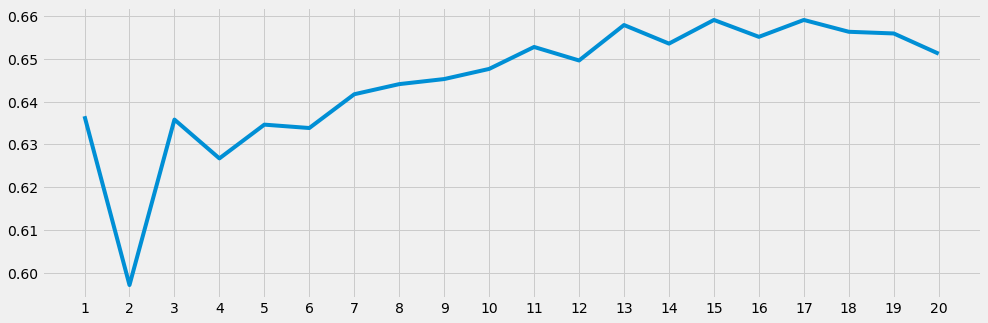

In [52]:
# Checking for optimum n_neighbor value
a_index=list(range(1,21))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in list(range(1,21)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

In [53]:
# Reframing KNN model with optimum n_neighbors value
Knn_model= KNeighborsClassifier(n_neighbors=9)
Knn_model.fit(x_train,y_train)
y_pred= Knn_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred))
print('Recall Score is:', recall_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('F1 score is:', f1_score(y_test, y_pred))

Accuracy Score is: 0.6452502956247537
Recall Score is: 0.7431578947368421
Precision Score: 0.664783427495292
F1 score is: 0.701789264413519


In [54]:
# Checking the Logistics Regression model
Logit_model.fit(x_train, y_train)
y_pred1= Logit_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred1))
print('Recall Score is:', recall_score(y_test, y_pred1))
print('Precision Score:', precision_score(y_test, y_pred1))
print('F1 score is:', f1_score(y_test, y_pred1))

Accuracy Score is: 0.62238864800946
Recall Score is: 0.7691228070175439
Precision Score: 0.6353623188405797
F1 score is: 0.6958730158730159


In [55]:
# Checking with the random forest classifier model

rf_model.fit(x_train, y_train)
y_pred3= rf_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred3))
print('Recall Score is:', recall_score(y_test, y_pred3))
print('Precision Score:', precision_score(y_test, y_pred3))
print('F1 score is:', f1_score(y_test, y_pred3))

Accuracy Score is: 0.7445802128498227
Recall Score is: 0.8203508771929825
Precision Score: 0.7488789237668162
F1 score is: 0.7829872739450771


In [56]:
# Checking with the Decision tree Classifier model
dt_model.fit(x_train, y_train)
y_pred4= dt_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred4))
print('Recall Score is:', recall_score(y_test, y_pred4))
print('Precision Score:', precision_score(y_test, y_pred4))
print('F1 score is:', f1_score(y_test, y_pred4))

Accuracy Score is: 0.6819077650768625
Recall Score is: 0.7024561403508772
Precision Score: 0.7232658959537572
F1 score is: 0.7127091491634034


In [57]:
# Checking with the AdaBoostClassifier model
Ab_model.fit(x_train, y_train)
y_pred5= Ab_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred5))
print('Recall Score is:', recall_score(y_test, y_pred5))
print('Precision Score:', precision_score(y_test, y_pred5))
print('F1 score is:', f1_score(y_test, y_pred5))

Accuracy Score is: 0.6799369333858889
Recall Score is: 0.7782456140350877
Precision Score: 0.6909657320872274
F1 score is: 0.732013201320132


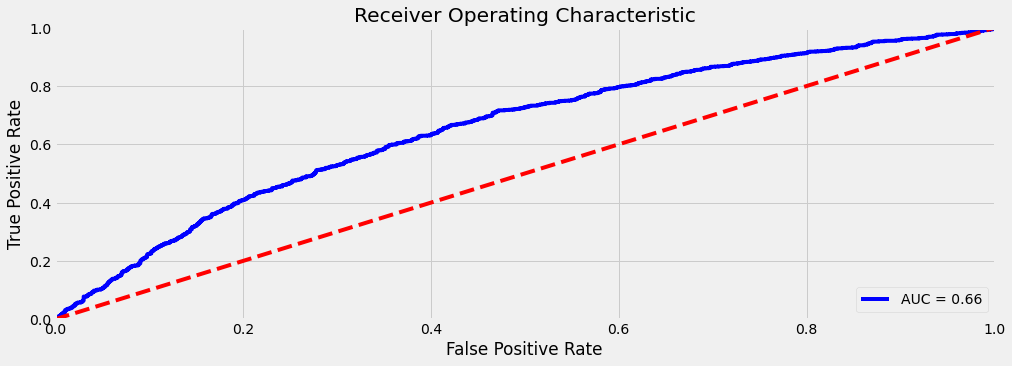

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = Logit_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

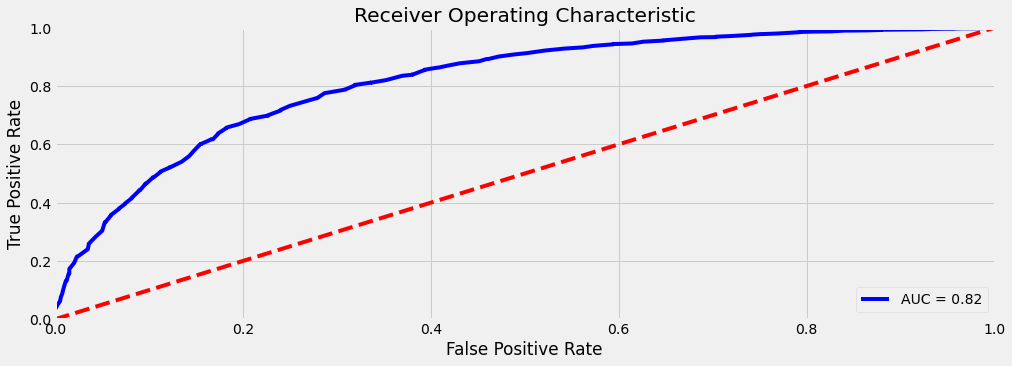

In [59]:
probs = rf_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

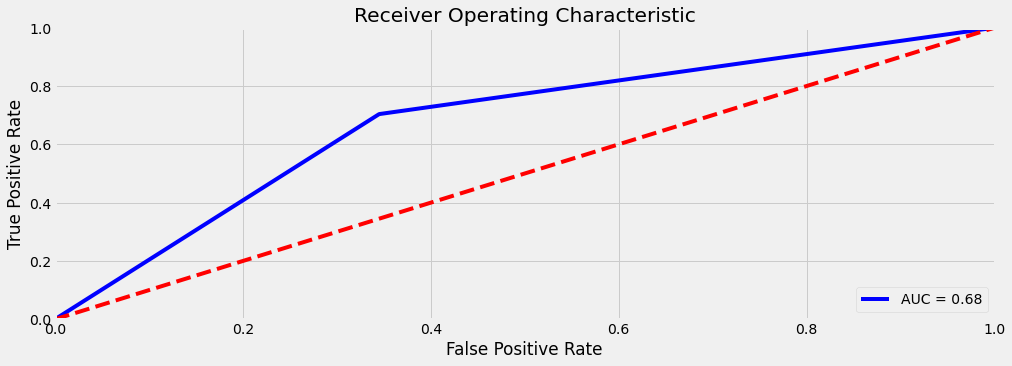

In [60]:
probs = dt_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

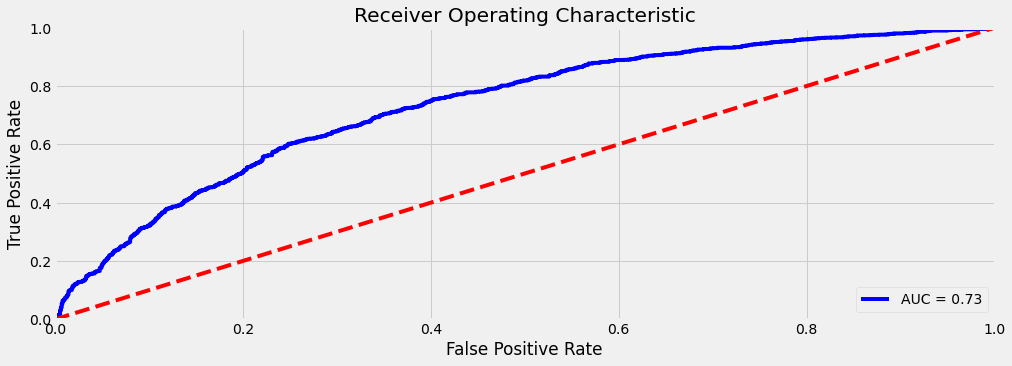

In [61]:
probs = Ab_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

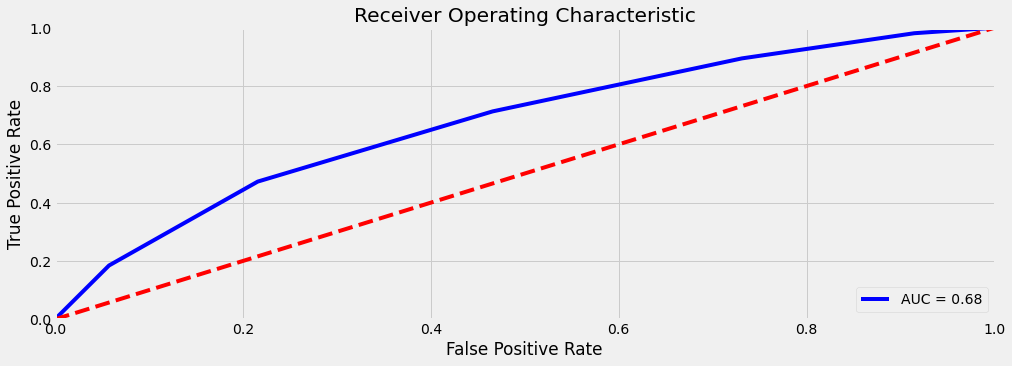

In [62]:
probs = knn_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
# Setting the criterion of RandomForestClassifier as entropy and n_estimator as 1000
rf_model = RandomForestClassifier(criterion='entropy', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf_model.fit(x_train, y_train)
y_pred6= rf_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred6))
print('Recall Score is:', recall_score(y_test, y_pred6))
print('Precision Score:', precision_score(y_test, y_pred6))
print('F1 score is:', f1_score(y_test, y_pred6))

Accuracy Score is: 0.7520693732755223
Recall Score is: 0.8421052631578947
Precision Score: 0.7481296758104738
F1 score is: 0.7923407065037966


In [64]:
dt_model= DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
dt_model.fit(x_train, y_train)
y_pred4= dt_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred4))
print('Recall Score is:', recall_score(y_test, y_pred4))
print('Precision Score:', precision_score(y_test, y_pred4))
print('F1 score is:', f1_score(y_test, y_pred4))

Accuracy Score is: 0.6728419392983839
Recall Score is: 0.6975438596491228
Precision Score: 0.7135678391959799
F1 score is: 0.7054648687012065


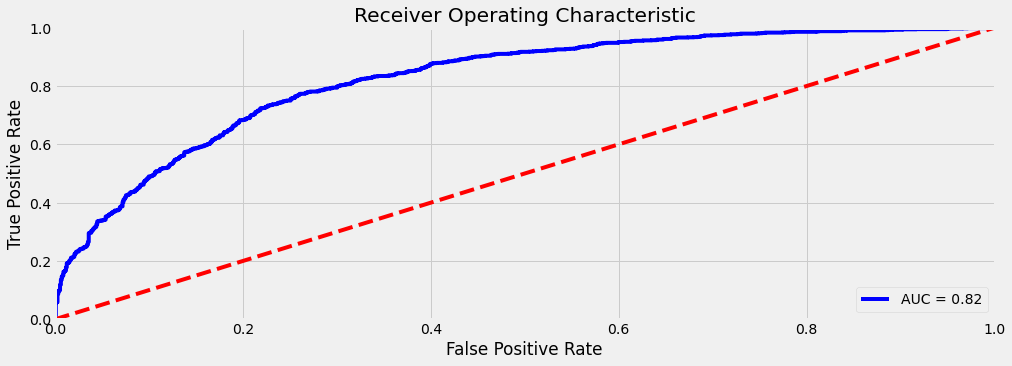

In [65]:
probs = rf_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
from catboost import CatBoostClassifier
Cb_model= CatBoostClassifier()
# Checking with the Decision tree Classifier model
Cb_model.fit(x_train, y_train)
y_pred7= Cb_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred7))
print('Recall Score is:', recall_score(y_test, y_pred7))
print('Precision Score:', precision_score(y_test, y_pred7))
print('F1 score is:', f1_score(y_test, y_pred7))

Learning rate set to 0.02771
0:	learn: 0.6883998	total: 178ms	remaining: 2m 58s
1:	learn: 0.6841760	total: 190ms	remaining: 1m 34s
2:	learn: 0.6796736	total: 201ms	remaining: 1m 6s
3:	learn: 0.6752865	total: 210ms	remaining: 52.4s
4:	learn: 0.6710078	total: 215ms	remaining: 42.8s
5:	learn: 0.6676587	total: 220ms	remaining: 36.5s
6:	learn: 0.6642315	total: 224ms	remaining: 31.8s
7:	learn: 0.6612520	total: 229ms	remaining: 28.5s
8:	learn: 0.6586235	total: 235ms	remaining: 25.8s
9:	learn: 0.6562290	total: 240ms	remaining: 23.7s
10:	learn: 0.6539623	total: 244ms	remaining: 22s
11:	learn: 0.6507966	total: 249ms	remaining: 20.5s
12:	learn: 0.6480721	total: 254ms	remaining: 19.3s
13:	learn: 0.6455276	total: 259ms	remaining: 18.2s
14:	learn: 0.6434022	total: 263ms	remaining: 17.3s
15:	learn: 0.6415037	total: 268ms	remaining: 16.5s
16:	learn: 0.6391551	total: 273ms	remaining: 15.8s
17:	learn: 0.6371309	total: 278ms	remaining: 15.2s
18:	learn: 0.6348057	total: 283ms	remaining: 14.6s
19:	learn: 0

171:	learn: 0.5344613	total: 1.32s	remaining: 6.38s
172:	learn: 0.5341813	total: 1.33s	remaining: 6.38s
173:	learn: 0.5338036	total: 1.34s	remaining: 6.36s
174:	learn: 0.5335941	total: 1.35s	remaining: 6.35s
175:	learn: 0.5332900	total: 1.35s	remaining: 6.34s
176:	learn: 0.5330100	total: 1.36s	remaining: 6.33s
177:	learn: 0.5327908	total: 1.37s	remaining: 6.32s
178:	learn: 0.5324965	total: 1.38s	remaining: 6.31s
179:	learn: 0.5321201	total: 1.38s	remaining: 6.29s
180:	learn: 0.5316525	total: 1.39s	remaining: 6.28s
181:	learn: 0.5311255	total: 1.39s	remaining: 6.27s
182:	learn: 0.5307895	total: 1.4s	remaining: 6.26s
183:	learn: 0.5304950	total: 1.41s	remaining: 6.25s
184:	learn: 0.5301380	total: 1.42s	remaining: 6.24s
185:	learn: 0.5299125	total: 1.42s	remaining: 6.23s
186:	learn: 0.5296747	total: 1.43s	remaining: 6.22s
187:	learn: 0.5293577	total: 1.44s	remaining: 6.21s
188:	learn: 0.5289641	total: 1.44s	remaining: 6.19s
189:	learn: 0.5286512	total: 1.45s	remaining: 6.18s
190:	learn: 0

336:	learn: 0.4904118	total: 2.41s	remaining: 4.74s
337:	learn: 0.4901869	total: 2.41s	remaining: 4.73s
338:	learn: 0.4900318	total: 2.42s	remaining: 4.72s
339:	learn: 0.4898753	total: 2.43s	remaining: 4.71s
340:	learn: 0.4895849	total: 2.43s	remaining: 4.7s
341:	learn: 0.4893312	total: 2.44s	remaining: 4.69s
342:	learn: 0.4891113	total: 2.44s	remaining: 4.68s
343:	learn: 0.4889449	total: 2.45s	remaining: 4.67s
344:	learn: 0.4887157	total: 2.46s	remaining: 4.66s
345:	learn: 0.4884551	total: 2.46s	remaining: 4.65s
346:	learn: 0.4881015	total: 2.47s	remaining: 4.64s
347:	learn: 0.4878659	total: 2.47s	remaining: 4.63s
348:	learn: 0.4877393	total: 2.48s	remaining: 4.62s
349:	learn: 0.4875306	total: 2.48s	remaining: 4.61s
350:	learn: 0.4873738	total: 2.49s	remaining: 4.6s
351:	learn: 0.4870547	total: 2.49s	remaining: 4.59s
352:	learn: 0.4868112	total: 2.5s	remaining: 4.58s
353:	learn: 0.4866517	total: 2.51s	remaining: 4.57s
354:	learn: 0.4864107	total: 2.51s	remaining: 4.57s
355:	learn: 0.4

516:	learn: 0.4507131	total: 3.5s	remaining: 3.27s
517:	learn: 0.4505151	total: 3.5s	remaining: 3.26s
518:	learn: 0.4503063	total: 3.51s	remaining: 3.25s
519:	learn: 0.4501227	total: 3.51s	remaining: 3.24s
520:	learn: 0.4500111	total: 3.52s	remaining: 3.24s
521:	learn: 0.4497967	total: 3.52s	remaining: 3.23s
522:	learn: 0.4496600	total: 3.53s	remaining: 3.22s
523:	learn: 0.4494608	total: 3.54s	remaining: 3.21s
524:	learn: 0.4492899	total: 3.54s	remaining: 3.2s
525:	learn: 0.4491165	total: 3.55s	remaining: 3.2s
526:	learn: 0.4489632	total: 3.55s	remaining: 3.19s
527:	learn: 0.4487642	total: 3.56s	remaining: 3.18s
528:	learn: 0.4485909	total: 3.56s	remaining: 3.17s
529:	learn: 0.4484167	total: 3.57s	remaining: 3.17s
530:	learn: 0.4482199	total: 3.58s	remaining: 3.16s
531:	learn: 0.4480902	total: 3.58s	remaining: 3.15s
532:	learn: 0.4479156	total: 3.59s	remaining: 3.15s
533:	learn: 0.4476736	total: 3.6s	remaining: 3.14s
534:	learn: 0.4474435	total: 3.6s	remaining: 3.13s
535:	learn: 0.4472

698:	learn: 0.4208968	total: 4.61s	remaining: 1.98s
699:	learn: 0.4208013	total: 4.61s	remaining: 1.98s
700:	learn: 0.4206647	total: 4.62s	remaining: 1.97s
701:	learn: 0.4205394	total: 4.63s	remaining: 1.96s
702:	learn: 0.4203795	total: 4.63s	remaining: 1.96s
703:	learn: 0.4202255	total: 4.64s	remaining: 1.95s
704:	learn: 0.4200401	total: 4.65s	remaining: 1.95s
705:	learn: 0.4199006	total: 4.66s	remaining: 1.94s
706:	learn: 0.4197368	total: 4.67s	remaining: 1.93s
707:	learn: 0.4195649	total: 4.67s	remaining: 1.93s
708:	learn: 0.4193469	total: 4.68s	remaining: 1.92s
709:	learn: 0.4191775	total: 4.69s	remaining: 1.91s
710:	learn: 0.4190166	total: 4.69s	remaining: 1.91s
711:	learn: 0.4188570	total: 4.7s	remaining: 1.9s
712:	learn: 0.4187249	total: 4.71s	remaining: 1.9s
713:	learn: 0.4186071	total: 4.71s	remaining: 1.89s
714:	learn: 0.4184409	total: 4.72s	remaining: 1.88s
715:	learn: 0.4182202	total: 4.73s	remaining: 1.88s
716:	learn: 0.4180323	total: 4.74s	remaining: 1.87s
717:	learn: 0.4

880:	learn: 0.3956706	total: 5.71s	remaining: 771ms
881:	learn: 0.3955890	total: 5.72s	remaining: 765ms
882:	learn: 0.3954867	total: 5.72s	remaining: 758ms
883:	learn: 0.3953960	total: 5.73s	remaining: 752ms
884:	learn: 0.3952923	total: 5.74s	remaining: 746ms
885:	learn: 0.3952000	total: 5.75s	remaining: 739ms
886:	learn: 0.3950567	total: 5.75s	remaining: 733ms
887:	learn: 0.3949522	total: 5.76s	remaining: 726ms
888:	learn: 0.3948366	total: 5.76s	remaining: 720ms
889:	learn: 0.3946815	total: 5.77s	remaining: 713ms
890:	learn: 0.3945454	total: 5.78s	remaining: 707ms
891:	learn: 0.3944257	total: 5.79s	remaining: 700ms
892:	learn: 0.3943580	total: 5.79s	remaining: 694ms
893:	learn: 0.3942644	total: 5.8s	remaining: 688ms
894:	learn: 0.3941138	total: 5.81s	remaining: 681ms
895:	learn: 0.3940182	total: 5.81s	remaining: 675ms
896:	learn: 0.3938968	total: 5.82s	remaining: 668ms
897:	learn: 0.3938020	total: 5.83s	remaining: 662ms
898:	learn: 0.3936654	total: 5.83s	remaining: 655ms
899:	learn: 0

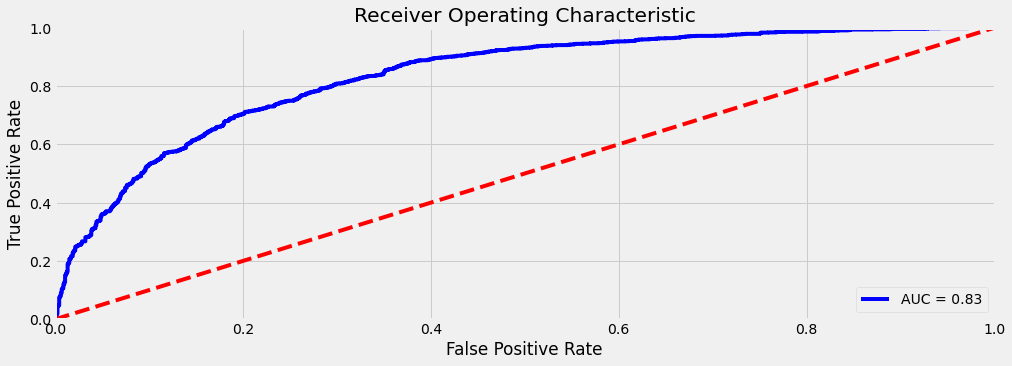

In [67]:
probs = Cb_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
from catboost import CatBoostClassifier
Cb_model= CatBoostClassifier()
# Checking with the Decision tree Classifier model
Cb_model.fit(x_train, y_train)
y_pred7= Cb_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred7))
print('Recall Score is:', recall_score(y_test, y_pred7))
print('Precision Score:', precision_score(y_test, y_pred7))
print('F1 score is:', f1_score(y_test, y_pred7))

Learning rate set to 0.02771
0:	learn: 0.6883998	total: 6.24ms	remaining: 6.23s
1:	learn: 0.6841760	total: 15.5ms	remaining: 7.72s
2:	learn: 0.6796736	total: 21.5ms	remaining: 7.15s
3:	learn: 0.6752865	total: 28.2ms	remaining: 7.03s
4:	learn: 0.6710078	total: 34.4ms	remaining: 6.84s
5:	learn: 0.6676587	total: 42.8ms	remaining: 7.1s
6:	learn: 0.6642315	total: 51ms	remaining: 7.23s
7:	learn: 0.6612520	total: 58.4ms	remaining: 7.24s
8:	learn: 0.6586235	total: 66ms	remaining: 7.27s
9:	learn: 0.6562290	total: 73.6ms	remaining: 7.28s
10:	learn: 0.6539623	total: 80.4ms	remaining: 7.22s
11:	learn: 0.6507966	total: 86.5ms	remaining: 7.12s
12:	learn: 0.6480721	total: 94.1ms	remaining: 7.15s
13:	learn: 0.6455276	total: 101ms	remaining: 7.09s
14:	learn: 0.6434022	total: 108ms	remaining: 7.09s
15:	learn: 0.6415037	total: 115ms	remaining: 7.07s
16:	learn: 0.6391551	total: 122ms	remaining: 7.04s
17:	learn: 0.6371309	total: 128ms	remaining: 7.01s
18:	learn: 0.6348057	total: 135ms	remaining: 6.98s
19:	

179:	learn: 0.5321201	total: 1.08s	remaining: 4.93s
180:	learn: 0.5316525	total: 1.09s	remaining: 4.93s
181:	learn: 0.5311255	total: 1.1s	remaining: 4.93s
182:	learn: 0.5307895	total: 1.1s	remaining: 4.93s
183:	learn: 0.5304950	total: 1.11s	remaining: 4.93s
184:	learn: 0.5301380	total: 1.12s	remaining: 4.93s
185:	learn: 0.5299125	total: 1.13s	remaining: 4.93s
186:	learn: 0.5296747	total: 1.13s	remaining: 4.93s
187:	learn: 0.5293577	total: 1.14s	remaining: 4.92s
188:	learn: 0.5289641	total: 1.15s	remaining: 4.92s
189:	learn: 0.5286512	total: 1.16s	remaining: 4.93s
190:	learn: 0.5283651	total: 1.16s	remaining: 4.93s
191:	learn: 0.5282145	total: 1.17s	remaining: 4.93s
192:	learn: 0.5280291	total: 1.18s	remaining: 4.92s
193:	learn: 0.5278237	total: 1.19s	remaining: 4.92s
194:	learn: 0.5274631	total: 1.19s	remaining: 4.92s
195:	learn: 0.5271187	total: 1.2s	remaining: 4.92s
196:	learn: 0.5269164	total: 1.21s	remaining: 4.92s
197:	learn: 0.5266900	total: 1.21s	remaining: 4.92s
198:	learn: 0.5

362:	learn: 0.4846092	total: 2.17s	remaining: 3.81s
363:	learn: 0.4844005	total: 2.18s	remaining: 3.81s
364:	learn: 0.4841028	total: 2.19s	remaining: 3.81s
365:	learn: 0.4838719	total: 2.2s	remaining: 3.81s
366:	learn: 0.4835645	total: 2.2s	remaining: 3.8s
367:	learn: 0.4832818	total: 2.21s	remaining: 3.8s
368:	learn: 0.4830689	total: 2.22s	remaining: 3.79s
369:	learn: 0.4828277	total: 2.22s	remaining: 3.79s
370:	learn: 0.4826074	total: 2.23s	remaining: 3.78s
371:	learn: 0.4823248	total: 2.24s	remaining: 3.78s
372:	learn: 0.4820716	total: 2.24s	remaining: 3.77s
373:	learn: 0.4818668	total: 2.25s	remaining: 3.76s
374:	learn: 0.4815911	total: 2.25s	remaining: 3.76s
375:	learn: 0.4812223	total: 2.26s	remaining: 3.75s
376:	learn: 0.4809975	total: 2.26s	remaining: 3.74s
377:	learn: 0.4807719	total: 2.27s	remaining: 3.73s
378:	learn: 0.4805104	total: 2.27s	remaining: 3.73s
379:	learn: 0.4802833	total: 2.28s	remaining: 3.72s
380:	learn: 0.4799326	total: 2.29s	remaining: 3.71s
381:	learn: 0.47

523:	learn: 0.4494608	total: 3.08s	remaining: 2.79s
524:	learn: 0.4492899	total: 3.09s	remaining: 2.79s
525:	learn: 0.4491165	total: 3.09s	remaining: 2.79s
526:	learn: 0.4489632	total: 3.1s	remaining: 2.78s
527:	learn: 0.4487642	total: 3.11s	remaining: 2.78s
528:	learn: 0.4485909	total: 3.11s	remaining: 2.77s
529:	learn: 0.4484167	total: 3.12s	remaining: 2.77s
530:	learn: 0.4482199	total: 3.13s	remaining: 2.76s
531:	learn: 0.4480902	total: 3.13s	remaining: 2.76s
532:	learn: 0.4479156	total: 3.14s	remaining: 2.75s
533:	learn: 0.4476736	total: 3.15s	remaining: 2.75s
534:	learn: 0.4474435	total: 3.16s	remaining: 2.74s
535:	learn: 0.4472668	total: 3.16s	remaining: 2.74s
536:	learn: 0.4471018	total: 3.17s	remaining: 2.73s
537:	learn: 0.4469363	total: 3.18s	remaining: 2.73s
538:	learn: 0.4467283	total: 3.18s	remaining: 2.72s
539:	learn: 0.4465211	total: 3.19s	remaining: 2.72s
540:	learn: 0.4463966	total: 3.2s	remaining: 2.71s
541:	learn: 0.4462209	total: 3.21s	remaining: 2.71s
542:	learn: 0.

682:	learn: 0.4233957	total: 4.18s	remaining: 1.94s
683:	learn: 0.4232722	total: 4.19s	remaining: 1.94s
684:	learn: 0.4231194	total: 4.2s	remaining: 1.93s
685:	learn: 0.4229454	total: 4.21s	remaining: 1.93s
686:	learn: 0.4227750	total: 4.21s	remaining: 1.92s
687:	learn: 0.4226651	total: 4.22s	remaining: 1.91s
688:	learn: 0.4225550	total: 4.23s	remaining: 1.91s
689:	learn: 0.4223948	total: 4.24s	remaining: 1.9s
690:	learn: 0.4222713	total: 4.24s	remaining: 1.9s
691:	learn: 0.4220830	total: 4.25s	remaining: 1.89s
692:	learn: 0.4219067	total: 4.26s	remaining: 1.89s
693:	learn: 0.4217669	total: 4.26s	remaining: 1.88s
694:	learn: 0.4216007	total: 4.27s	remaining: 1.87s
695:	learn: 0.4214215	total: 4.28s	remaining: 1.87s
696:	learn: 0.4212565	total: 4.28s	remaining: 1.86s
697:	learn: 0.4210624	total: 4.29s	remaining: 1.86s
698:	learn: 0.4208968	total: 4.3s	remaining: 1.85s
699:	learn: 0.4208013	total: 4.3s	remaining: 1.84s
700:	learn: 0.4206647	total: 4.31s	remaining: 1.84s
701:	learn: 0.420

872:	learn: 0.3967181	total: 5.44s	remaining: 792ms
873:	learn: 0.3966119	total: 5.45s	remaining: 786ms
874:	learn: 0.3965307	total: 5.46s	remaining: 779ms
875:	learn: 0.3964233	total: 5.46s	remaining: 773ms
876:	learn: 0.3963155	total: 5.47s	remaining: 767ms
877:	learn: 0.3961592	total: 5.47s	remaining: 760ms
878:	learn: 0.3960162	total: 5.48s	remaining: 754ms
879:	learn: 0.3958394	total: 5.48s	remaining: 748ms
880:	learn: 0.3956706	total: 5.49s	remaining: 741ms
881:	learn: 0.3955890	total: 5.49s	remaining: 735ms
882:	learn: 0.3954867	total: 5.5s	remaining: 728ms
883:	learn: 0.3953960	total: 5.5s	remaining: 722ms
884:	learn: 0.3952923	total: 5.51s	remaining: 716ms
885:	learn: 0.3952000	total: 5.51s	remaining: 709ms
886:	learn: 0.3950567	total: 5.52s	remaining: 703ms
887:	learn: 0.3949522	total: 5.52s	remaining: 697ms
888:	learn: 0.3948366	total: 5.53s	remaining: 690ms
889:	learn: 0.3946815	total: 5.53s	remaining: 684ms
890:	learn: 0.3945454	total: 5.54s	remaining: 678ms
891:	learn: 0.